In [1]:
import os
import json
import numpy as np 
import cv2 as cv
from matplotlib import pyplot as plt 

In [2]:
root_path_name = '/Disk1/dataset/OCT/data/dme/'
label_path = os.path.join(root_path_name, 'label/')
image_path = os.path.join(root_path_name, 'image/')

In [3]:
filename = 'train.json'
with open(os.path.join(label_path, filename), 'r') as f:
    list = json.loads(f.read())


(8, 768)
(224, 768)


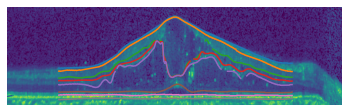

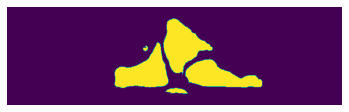

In [6]:
import matplotlib.image as mpimg
dicts = list[5]
image0_path = os.path.join(image_path, dicts['image_name'])
img = mpimg.imread(image0_path)
plt.imshow(img)
plt.axis('off')

bds = dicts['bds']
print(np.array(bds).shape)
print(np.array(img).shape)
C = len(bds)
for i in range(C):
    x = range(len(bds[i]))
    y = bds[i]
    plt.plot(x, y)
plt.show()

mask = dicts['mask']
plt.imshow(dicts['mask'])
plt.axis('off')
plt.show()

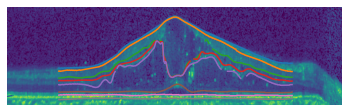

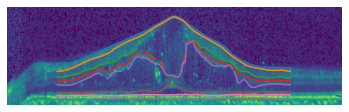

1.2056458576055968


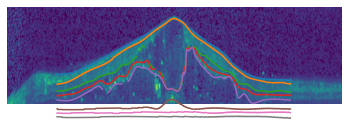

In [36]:
import matplotlib.image as mpimg
import cv2

dicts = list[5]
image0_path = os.path.join(image_path, dicts['image_name'])
bds = dicts['bds']
img = mpimg.imread(image0_path)

plt.imshow(img)
plt.axis('off')
C = len(bds)
for i in range(C):
    x = range(len(bds[i]))
    y = bds[i]
    plt.plot(x, y)
plt.show()

img = cv2.flip(img, 1)
bds = np.flip(bds, 1)
plt.imshow(img)
plt.axis('off')
C = len(bds)
for i in range(C):
    x = range(len(bds[i]))
    y = bds[i]
    plt.plot(x, y)
plt.show()

sf = 0.3
scale = np.clip(np.random.randn() * sf + 1, 1 - sf, 1 + sf)
print(scale)
(h, w) = img.shape
M = np.float32([[1, 0, 0], [0, scale, 0]])
img = cv2.warpAffine(img, M, (w, h))
plt.imshow(img)
plt.axis('off')
C = len(bds)

for i in range(C):
    x = range(len(bds[i]))
    y = []
    for j in bds[i]:
        if j == None:
            y.append(j)
        else:
            y.append(j * scale)
    plt.plot(x, y)
plt.show()